In [21]:
#importar librerias necesarias
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np #

#cargar juego de datos
cancer = load_breast_cancer()

In [34]:
#Para observar caracteristicas de cancer convertimos en dataframe de pandas
cancerpd = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#Observar variables(columnas) y datos validos en cada una (instancias)
cancerpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

(569, 30)

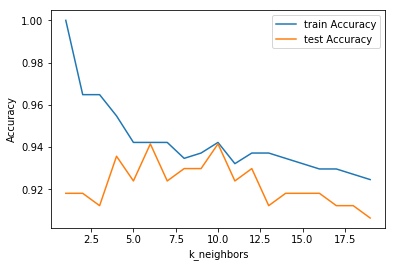

In [83]:
#1.a Clasificador K-Neighbors
from sklearn.neighbors import KNeighborsClassifier
#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30)
train_score = []
test_score = []
#se prueba algoritmo con valores de k desde 1 hasta 20
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
# almacena train_score 
    train_score.append(clf.score(X_train, y_train))
# almacena test_score
    test_score.append(clf.score(X_test, y_test))
# crea grafico que relaciona score y k neighbors
plt.plot(neighbors_settings, train_score, label="train Accuracy")
plt.plot(neighbors_settings, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.legend()
#se puede observar en con k cercano a 10 se obtiene un buen resultado para test, evitando el overfitting
#Además, se alcanza accuracy cercano al 95%


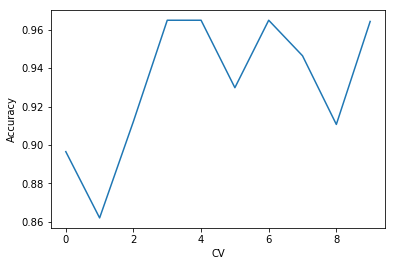

In [84]:
#1.b Validación usando la función cross_val_score para KNeighbors
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(clf,cancer.data, cancer.target, cv=10)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")

#vemos que las diferentes repeticiones de cv alcanzan valores de Accuracy máximo cercanos al 96%,
#siendo estos resultados similares al acercamiento anterior


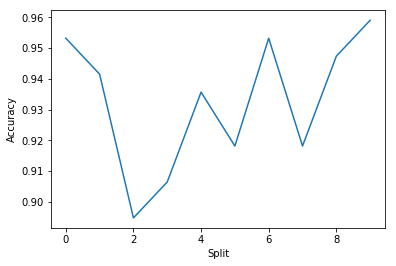

In [85]:
#1.c Validación usando la función ShuffleSplit para KNeighbors
from sklearn.model_selection import ShuffleSplit
clf = KNeighborsClassifier(n_neighbors=10)
shuffle = ShuffleSplit(n_splits=10, train_size=0.7,test_size=0.3, random_state=0)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle)
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Split")
#vemos que las diferentes splits de cv alcanzan valores de accuracy máximo cercanos al 96%,
#siendo estos resultados similares a los dos acercamientos anteriores
#En resumen, los diferentes métodos Kneighbors alcanzan un accuracy máximo cercano a 96% para estos datos

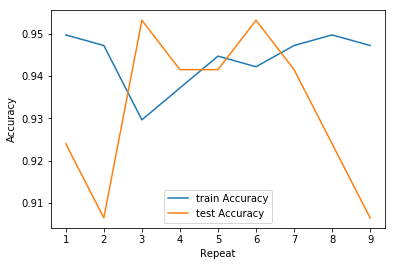

In [81]:
#2.a Clasificador Naive_bayes
from sklearn.naive_bayes import GaussianNB
train_score = []
test_score = []
repeat = range(1,10)
for j in repeat:
    #se separan datos train y test
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30)
    # raliza la clasificacion usando naive_bayes
    nbg = GaussianNB().fit(X_train, y_train)
    # almacena train_score 
    train_score.append(nbg.score(X_train, y_train))
    # almacena test_score
    test_score.append(nbg.score(X_test, y_test))
# crea grafico que relaciona score y repeat
plt.plot(repeat, train_score, label="train Accuracy")
plt.plot(repeat, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Repeat")
plt.legend()

#De las 10 repeticiones del algoritmo, vemos que accuracy no supera el 96%

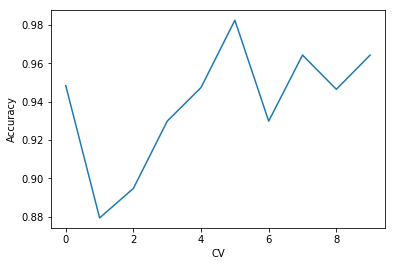

In [86]:
#2.b Validación usando la función cross_val_score para Naive_bayes
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()
scores = cross_val_score(nbg,cancer.data, cancer.target, cv=10)
#crea gráfico que relaciona el score con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")

#vemos que las diferentes repeticiones de cv alcanzan valores de Accuracy máximo cercanos al 98%,
#pero son muy variables
#siendo estos resultados similares al acercamiento anterior

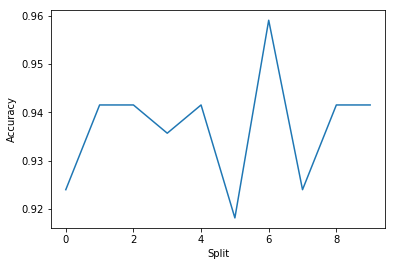

In [87]:
#2.c Validación usando la función ShuffleSplit para Naive_bayes
from sklearn.model_selection import ShuffleSplit
nbg = GaussianNB()
shuffle = ShuffleSplit(n_splits=10, train_size=0.7,test_size=0.3, random_state=0)
scores = cross_val_score(nbg, cancer.data, cancer.target, cv=shuffle)
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Split")
#vemos que las diferentes splits de cv alcanzan valores de accuracy máximo cercanos al 96%, y varían entre 92-96%
#siendo estos resultados similares a los dos acercamientos anteriores
#En resumen, los diferentes métodos Naive_bayes alcanzan un Accuracy máximo cercano a 96% para estos datos,
#pero muestran resultados de accuracy con mucha variación

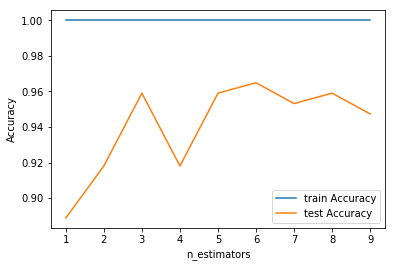

In [104]:
#3.a Clasificador ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30)
train_score = []
test_score = []
leaves = range(1,10)
for k in leaves:
    etc = ExtraTreesClassifier(n_estimators=k)
    etc.fit(X_train, y_train)
# almacena train_score 
    train_score.append(etc.score(X_train, y_train))
# almacena test_score
    test_score.append(etc.score(X_test, y_test))
# crea grafico que relaciona accuracy con n_estimators
plt.plot(leaves, train_score, label="train Accuracy")
plt.plot(leaves, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()
#Este clasificador produce un overfitting completo para train, y por ende, no sería recomendable usarlo

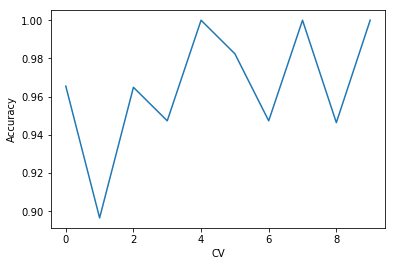

In [105]:
#3.b Validación usando la función cross_val_score para ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
scores = cross_val_score(etc,cancer.data, cancer.target, cv=10)
#crea gráfico que relaciona el accuracy con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")

#vemos que las diferentes repeticiones de cv alcanzan valores de Accuracy muy variables, desde 90% hasta 100%
#y no parecen ser muy consistentes

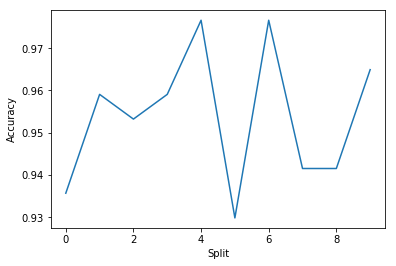

In [106]:
#3.c Validación usando la función ShuffleSplit para ExtraTreesClassifier
from sklearn.model_selection import ShuffleSplit
etc = ExtraTreesClassifier()
shuffle = ShuffleSplit(n_splits=10, train_size=0.7,test_size=0.3, random_state=0)
scores = cross_val_score(etc, cancer.data, cancer.target, cv=shuffle)
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Split")
#vemos que las diferentes splits alcanzan valores de Accuracy muy variables, desde 93% hasta 98%
#siendo estos resultados similares al acercamiento anterior, pues parace poco consistente
#En resumen, los diferentes métodos ExtraTreesClassifier aplicados a estos datos muestran resultados 
# muy variables para los métodos de validación y de overfitting completo para el método de splitting en test-train
#y por lo tanto, no considero muy apropiado el uso de este algoritmo

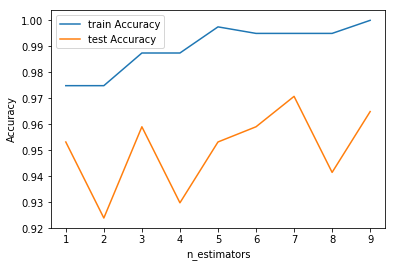

In [94]:
#4.a Clasificador RandomForest
from sklearn.ensemble import RandomForestClassifier
#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30)
train_score = []
test_score = []
#genera resultados para n_estimators de 1 a 10
leaves = range(1,10)
for k in leaves:
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
# almacena train_score 
    train_score.append(rfc.score(X_train, y_train))
# almacena test_score
    test_score.append(rfc.score(X_test, y_test))
# crea grafico que relaciona accuracy con n_estimators
plt.plot(leaves, train_score, label="train Accuracy")
plt.plot(leaves, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

#este clasificador tiende a producir un overfitting, pues Accuracy de train es superior al de test usando
#diferentes n_estimators


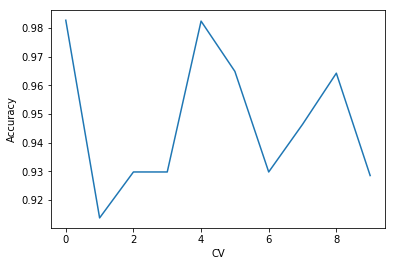

In [101]:
#4.b Validación usando la función cross_val_score para Random_forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
scores = cross_val_score(rfc,cancer.data, cancer.target, cv=10)
#crea gráfico que relaciona el accuracy con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")

#vemos que las diferentes repeticiones de cv alcanzan valores de Accuracy muy variables, desde 88% hasta 100%
#y no parecen ser muy consistentes

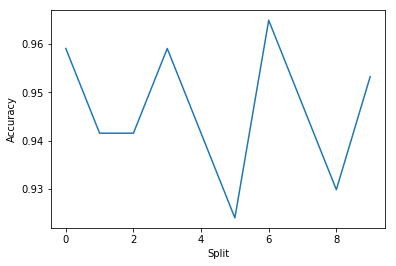

In [102]:
#4.c Validación usando la función ShuffleSplit para Random_forests
from sklearn.model_selection import ShuffleSplit
rfc = RandomForestClassifier()
shuffle = ShuffleSplit(n_splits=10, train_size=0.7,test_size=0.3, random_state=0)
scores = cross_val_score(rfc, cancer.data, cancer.target, cv=shuffle)
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Split")
#vemos que las diferentes splits alcanzan valores de Accuracy muy variables, desde 90% hasta 98%
#siendo estos resultados similares al acercamiento anterior, pues parace poco consistente
#En resumen, los diferentes métodos Random_forest aplicados a estos datos muestran resultados muy variables para los
# métodos de validación y de overfitting para el método de splitting en test-train
#y por lo tanto, no considero muy apropiado el uso de este algoritmo

/home/dennisjimenez/miniconda3/envs/py3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


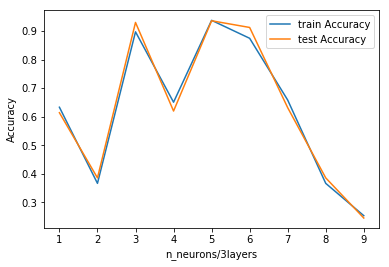

In [117]:
#5.a Clasificador Neural_network, 3 layers
from sklearn.neural_network import MLPClassifier
#se separan datos train y test
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.30)
train_score = []
test_score = []
#genera resultados para neuronas de 1 a 5
neuronas = range(1,10)
for k in neuronas:
    mlp = MLPClassifier(hidden_layer_sizes=(k,k,k))
    mlp.fit(X_train,y_train)
# almacena train_score 
    train_score.append(mlp.score(X_train, y_train))
# almacena test_score
    test_score.append(mlp.score(X_test, y_test))
# crea grafico que relaciona accuracy con n_neuronas
plt.plot(leaves, train_score, label="train Accuracy")
plt.plot(leaves, test_score, label="test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neurons/3layers")
plt.legend()

#Además del warning, el usar una red neuronal de 3 capas, con hasta 10 neuronas cada capa,se logra observar
#variación en cuanto al accuracy. Se notan resultados que pueden llegar a un 90% accuracy, pero puede ser tan
#bajo como 40%. Entonces, los resultados no parece ser muy consistentes para estas neural_networks


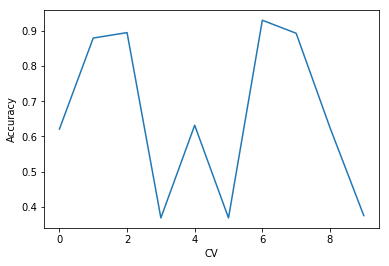

In [118]:
#5.b Validación usando la función cross_val_score para Neural_network, 3 layers
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
scores = cross_val_score(mlp,cancer.data, cancer.target, cv=10)
#crea gráfico que relaciona el accuracy con el cv
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("CV")

#vemos que las diferentes repeticiones de cv alcanzan valores de Accuracy muy variables, desde 40% hasta 90%
#y no parecen ser muy consistentes


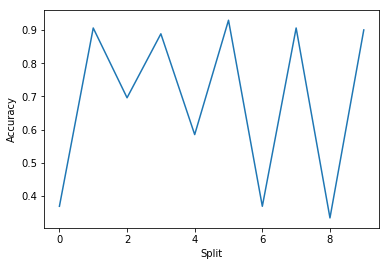

In [122]:
#5.c Validación usando la función ShuffleSplit paraNeural_network, 3 layers
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
shuffle = ShuffleSplit(n_splits=10, train_size=0.7,test_size=0.3, random_state=0)
scores = cross_val_score(mlp, cancer.data, cancer.target, cv=shuffle)
plt.plot(scores, label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Split")
#vemos que las diferentes splits alcanzan valores de Accuracy muy variables, desde 40% hasta 90%
#siendo estos resultados similares al acercamiento anterior, pues parace poco consistente
#En resumen, los diferentes métodos Neural_network aplicados a estos datos muestran resultados muy variables 
#para los métodos de validación y de overfitting para el método de splitting en test-train
#y por lo tanto, no considero muy apropiado el uso de este algoritmo

Conclusiones:

De los 5 algoritmos de clasificación aplicados al cancer_data, dos algoritos (#1.a Clasificador K-Neighbors y #2.a Clasificador Naive_bayes) paracen mostrar resultados bastantes consistentes (accuracy cercana al 96%) tanto para el modelo de análisis de split en train-test, como para los modelos de cross-validation aplicados

Empero, los otros tres algoritmos de clasificación (#3.a Clasificador ExtraTreesClassifier, #4.a Clasificador RandomForest, #5.a Clasificador Neural_network, 3 layers) muestran resultados de overfitting (3.a y 4.a) o de inconsistencias, tanto para el modelo de análisis de split en train-test, como para los modelos de cross-validation aplicados, los que sugiere que el uso de estos clasificadores para los datos de cancer no son apropiados